<a href="https://colab.research.google.com/github/gar1ma/DA-Experiments/blob/main/DA_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 04: 22/03/2022
UCID:2019120027


Lab 4: Linear Regression
Objective:
Building Linear Regression model for given dataset.

Problem 1.1 - Creating Our First Model

We are interested in how changes in these variables affect future temperatures, as well as how well these variables explain temperature changes so far. To do this, first read the dataset climate_change.csv into Python.

Then, split the data into a training set, consisting of all the observations up to and including 2006, and a testing set consisting of the remaining years (hint: use subset). A training set refers to the data that will be used to build the model, and a testing set refers to the data we will use to test our predictive ability.

Next, build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables (Year and Month should NOT be used in the model). Use the training set to build the model.

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #using seaborn library for visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib import pyplot as plt
%matplotlib inline 
from sklearn.metrics import r2_score
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("climate_change.csv") #reading the data
df.head(5) # To display the top 5 rows 

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
df.tail(5)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [5]:
len(df.columns)

11

In [6]:
len(df)

308

In [7]:
df.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [8]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [9]:
print(df.isnull().sum())

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64


In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


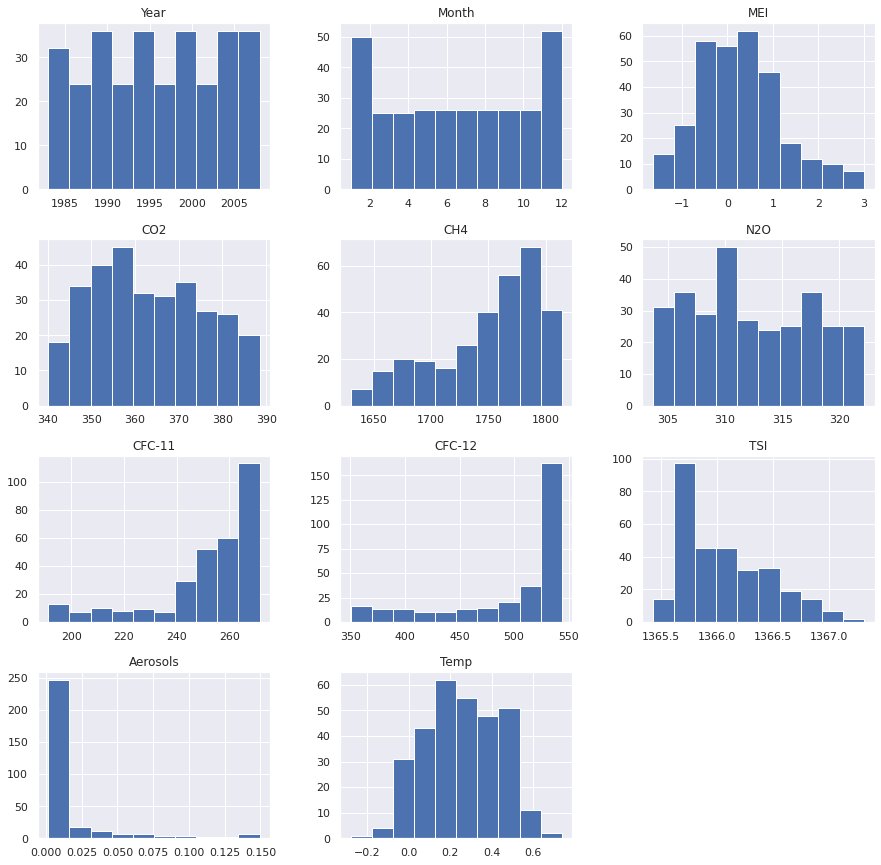

In [11]:
df.hist(figsize=(15,15))
plt.show()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


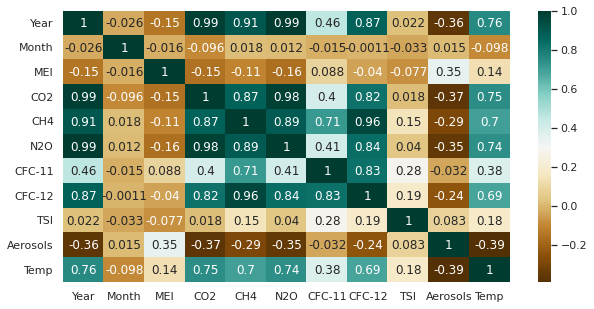

In [12]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Temp has strong correlation with CO2, CH4, N2O, CFC-12

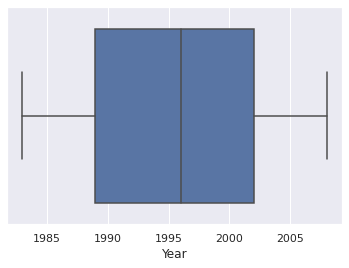

In [13]:
sns.boxplot(x=df['Year'])

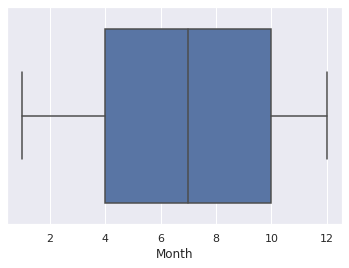

In [14]:
sns.boxplot(x=df['Month'])

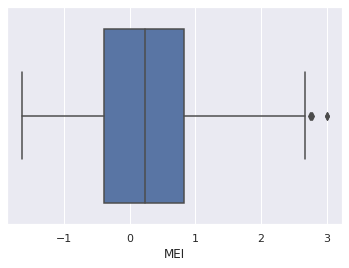

In [15]:
sns.boxplot(x=df['MEI'])

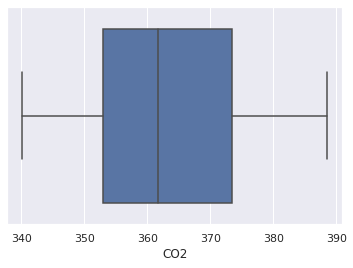

In [16]:
sns.boxplot(x=df['CO2'])

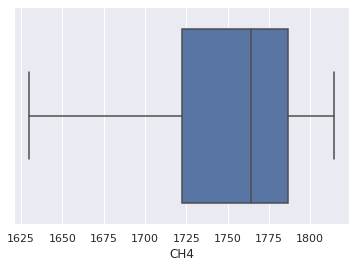

In [17]:
sns.boxplot(x=df['CH4'])

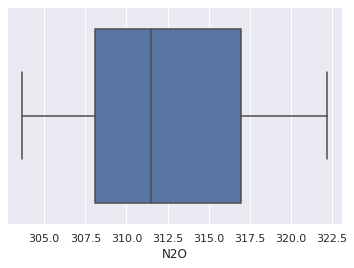

In [18]:
sns.boxplot(x=df['N2O'])

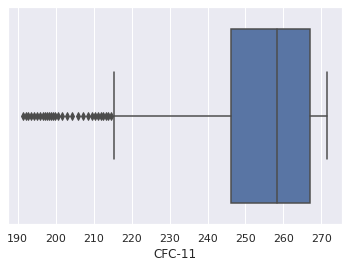

In [19]:
sns.boxplot(x=df['CFC-11'])

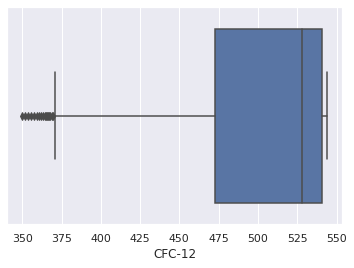

In [20]:
sns.boxplot(x=df['CFC-12'])

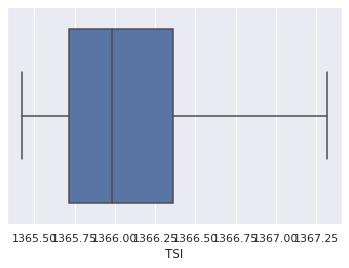

In [21]:
sns.boxplot(x=df['TSI'])

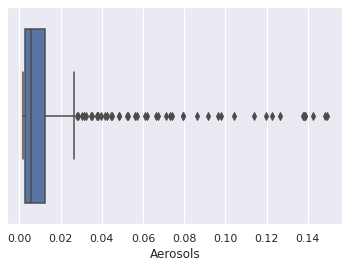

In [22]:
sns.boxplot(x=df['Aerosols'])

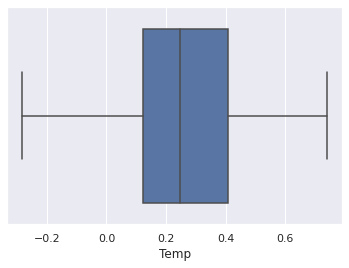

In [23]:
sns.boxplot(x=df['Temp'])

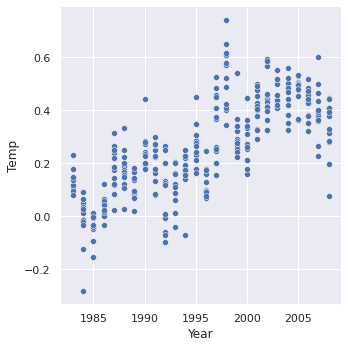

In [24]:
sns.relplot(y='Temp',x='Year',data=df) #relational plot between 2 variables (same as scatterplot command)

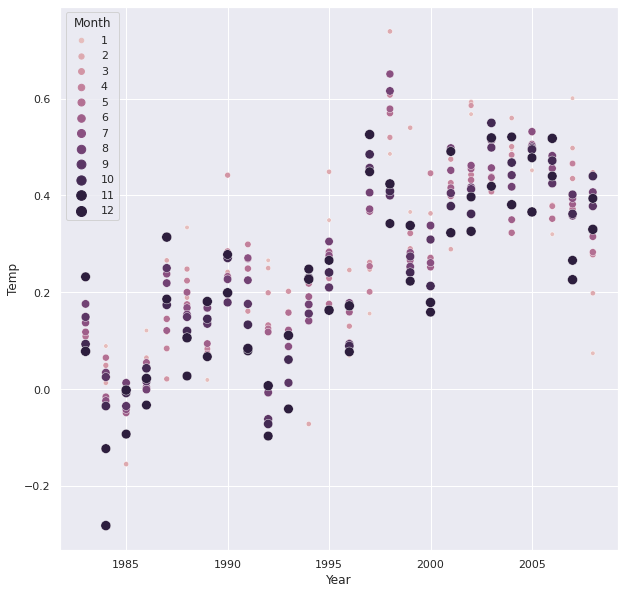

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="Year", y="Temp", hue="Month",size="Month",sizes=(20, 100), hue_norm=(0, 11), legend="full")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

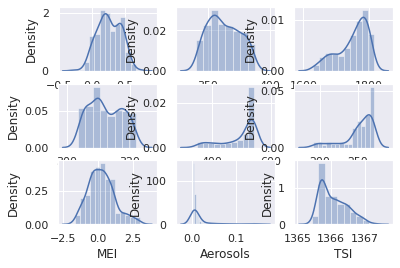

In [26]:
plt.subplot(331)
sns.distplot(df['Temp'])
plt.subplot(332)
sns.distplot(df['CO2'])
plt.subplot(333)
sns.distplot(df['CH4'])
plt.subplot(334)
sns.distplot(df['N2O'])
plt.subplot(335)
sns.distplot(df['CFC-12'])
plt.subplot(336)
sns.distplot(df['CFC-11'])
plt.subplot(337)
sns.distplot(df['MEI'])
plt.subplot(338)
sns.distplot(df['Aerosols'])
plt.subplot(339)
sns.distplot(df['TSI'])

In [27]:
#finding inter quartile range (IQR) to remove outliers (can also be done using Z score)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year        13.00000
Month        6.00000
MEI          1.22925
CO2         20.43500
CH4         64.70250
N2O          8.86750
CFC-11      20.73550
CFC-12      68.11350
TSI          0.64620
Aerosols     0.00980
Temp         0.28550
dtype: float64


In [28]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(243, 11)

In [29]:
df1 = df[ df.iloc[:,0]<=2006]  
df1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
29,1985,10,-0.140,343.08,1681.56,305.395,215.327,390.676,1365.5269,0.0101,-0.008
30,1985,11,-0.050,344.40,1680.68,305.530,216.282,392.714,1365.6289,0.0097,-0.093
31,1985,12,-0.293,345.82,1677.99,305.653,217.326,394.539,1365.6794,0.0122,-0.002
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
33,1986,2,-0.191,347.13,1666.83,305.911,219.379,397.345,1365.5475,0.0158,0.065


In [30]:
df2=df[df['Year']<=2006].reset_index(drop=True)
df2.head()
len(df2)
df2.shape #df2 is training set

(219, 11)

training data set contains 219 rows 
Testing dataset contains 243-219 = 24 rows

In [31]:
import statsmodels.api as sm
x = df[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
y = df['Temp']
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     69.11
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.36e-57
Time:                        09:33:39   Log-Likelihood:                 251.36
No. Observations:                 243   AIC:                            -484.7
Df Residuals:                     234   BIC:                            -453.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8378     23.736     -2.563      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
#multiple linear regression in python 
#build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables 
#training dataset
#x = df2[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
x_train = df2[['MEI','CFC-12','TSI','Aerosols']]
y_train = df2['Temp']
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
#Intercept and Coefficient to get the regression equation
#Regression equation=intercewpt+coeff+error
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
#testing dataset
df3=df[df['Year']>2006].reset_index(drop=True)
df3.head()
len(df3)
df3.shape 
x_test = df3[['MEI','CFC-12','TSI','Aerosols']]
y_test = df3['Temp']
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  -9.495849892205442
Coefficients:
Prediction for test set: [0.4072534  0.37889222 0.35701504 0.34790661 0.36846236 0.33155887
 0.33571998 0.3240317  0.27275619 0.27584538 0.27147285 0.27454456
 0.28800042 0.26317326 0.24851383 0.29748267 0.34039491 0.37300709
 0.36141764 0.338665   0.30294837 0.28919484 0.2975865  0.29732251]
R squared: 67.66
Mean Absolute Error: 0.08354105489904644
Mean Square Error: 0.01030196227067488
Root Mean Square Error: 0.10149858260426536


In [33]:
import statsmodels.api as sm
x = df[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
y = df['Temp']
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     69.11
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.36e-57
Time:                        09:33:39   Log-Likelihood:                 251.36
No. Observations:                 243   AIC:                            -484.7
Df Residuals:                     234   BIC:                            -453.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8378     23.736     -2.563      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
#multiple linear regression in python 
#build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables 
#training dataset
x = df2[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
y = df2['Temp']
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x, y)
#Intercept and Coefficient to get the regression equation
#Regression equation=intercewpt+coeff+error
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
#testing dataset
df3=df[df['Year']>2006].reset_index(drop=True)
df3.head()
len(df3)
df3.shape 
x_test = df3[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
y_test = df3['Temp']
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  -51.031969159858036
Coefficients:
Prediction for test set: [0.47395865 0.4503635  0.43347525 0.43430288 0.45407379 0.42558192
 0.4256269  0.40086034 0.34299562 0.34452906 0.34506256 0.3546125
 0.37297068 0.35481019 0.34472978 0.3962589  0.43969896 0.46681556
 0.45350739 0.42400764 0.38408517 0.36584435 0.38171572 0.3874683 ]
R squared: 72.19
Mean Absolute Error: 0.07881358260266709
Mean Square Error: 0.01062595645613692
Root Mean Square Error: 0.10308228002977486


We see that when we consider all the variables we get a better model (comparative R square value)

R squared value: 72.19

Problem 2.1 - Understanding the Model

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures.

Which of the following is the simplest correct explanation for this contradiction?

I. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.

II. There is not enough data, so the regression coefficients being estimated are not accurate.

III. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.


ANSWER: III

QUESTION 2

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Compute the correlations between all the variables in the training set. Which of the following independent
variables is N2O highly correlated with (absolute correlation greater than 0.7)? Select all that apply.
a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosso (AROUND 3)

In [35]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['MEI']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.062


In [36]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['CO2']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.975


In [37]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['CH4']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.890


In [38]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['N2O']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [39]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['CFC-11']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.327


In [40]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['CFC-12']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.865


In [41]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['TSI']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.160


In [42]:
# Convert dataframe into series
list1 = df2['N2O']
list2 = df2['Aerosols']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.661


So the following independent variables are higly correlated to N2O (considering pearson's coefficient to be greater than 0.7): 
CO2, CH4, CFC-12 (and obviously N2O)

In [43]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['Aerosols']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.231


In [44]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['TSI']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.257


In [45]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['CFC-12']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.749


In [46]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['N2O']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.327


In [47]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['CH4']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.628


In [48]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['CO2']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.342


In [49]:
# Convert dataframe into series
list1 = df2['CFC-11']
list2 = df2['MEI']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.166


So the independent variables are higly correlated to CFC-11 is CFC-12 (and obviously CFC-11) (CH4 can also be considered as its value is near 0.7)

QUESTION 3 - Simplifying the Model

Given that the correlations are so high, let us focus on the N2O variable and build a model with only MEI, TSI, Aerosols and N2O as independent variables. Remember to use the training set to build the model.
(We are using variables whose correlations are high as obtained in previous questions so N2O opposed to CO2, CH4, CFC-12)

Enter the coefficient of N2O in this reduced model: ______________

(How does this compare to the coefficient in the previous model with all of the variables?)

Enter the model R2:

In [50]:
import statsmodels.api as sm
x = df[['MEI','TSI','Aerosols','N2O']]
y = df['Temp']
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.18e-57
Time:                        09:33:40   Log-Likelihood:                 242.35
No. Observations:                 243   AIC:                            -474.7
Df Residuals:                     238   BIC:                            -457.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.1957     22.820     -3.164      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
import statsmodels.api as sm
x = df2[['MEI','TSI','Aerosols','N2O']]
y = df2['Temp']
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           8.92e-56
Time:                        09:36:52   Log-Likelihood:                 223.51
No. Observations:                 219   AIC:                            -437.0
Df Residuals:                     214   BIC:                            -420.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.1366     23.146     -2.296      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
#multiple linear regression in python 
#build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables 
#training dataset
#x = df2[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
x_train = df2[['MEI','TSI','Aerosols','N2O']]
y_train = df2['Temp']
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
#Intercept and Coefficient to get the regression equation
#Regression equation=intercewpt+coeff+error
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
#testing dataset
df3=df[df['Year']>2006].reset_index(drop=True)
df3.head()
len(df3)
df3.shape 
x_test = df3[['MEI','TSI','Aerosols','N2O']]
y_test = df3['Temp']
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  -53.136571862980446
Coefficients:
Prediction for test set: [0.4994973  0.47402556 0.45350238 0.44432044 0.4591232  0.42707112
 0.4311838  0.42411848 0.38135484 0.38933851 0.38846345 0.39489663
 0.4093001  0.38835418 0.3726421  0.41817244 0.45693594 0.48525866
 0.47434819 0.45574824 0.43001199 0.42539002 0.43910982 0.44125798]
R squared: 70.63
Mean Absolute Error: 0.09020686837753328
Mean Square Error: 0.013717618459982634
Root Mean Square Error: 0.117122237256563


New coefficient of N2O is  0.0217 (earlier it was negative around -0.0033) The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

A positive sign indicates that as the predictor variable increases, the response variable also increases. A negative sign indicates that as the predictor variable increases, the response variable decreases

In [52]:
import statsmodels.api as sm
x = df[['CO2','CH4','CFC-12']]
y = df['N2O']
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    N2O   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2298.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.86e-176
Time:                        09:33:40   Log-Likelihood:                -322.92
No. Observations:                 243   AIC:                             653.8
Df Residuals:                     239   BIC:                             667.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.5092      6.396     21.344      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
#multiple linear regression in python 
#build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables 
#training dataset
#x = df2[['MEI','CO2','CH4','N2O','CFC-11', 'CFC-12','TSI','Aerosols']]
x_train = df2[['CO2','CH4','CFC-12']]
y_train = df2['N2O']
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
#Intercept and Coefficient to get the regression equation
#Regression equation=intercewpt+coeff+error
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
#testing dataset
df3=df[df['Year']>2006].reset_index(drop=True)
df3.head()
len(df3)
df3.shape 
x_test = df3[['CO2','CH4','CFC-12']]
y_test = df3['N2O']
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  139.85760488583014
Coefficients:
Prediction for test set: [320.28158093 320.68616475 320.94964309 321.56576468 321.45074184
 320.88316161 320.06248959 319.40298671 319.43334822 319.74531591
 320.23206191 320.79717971 321.46103706 321.38369891 321.17370411
 321.58380693 322.16140591 321.8171164  321.05967171 320.18148939
 320.23740246 320.73834789 321.08575041 321.59856132]
R squared: 95.84
Mean Absolute Error: 0.6387354544843925
Mean Square Error: 0.5726378477687616
Root Mean Square Error: 0.756728384408013


ref: https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

https://towardsdatascience.com/exploratory-data-analysis-topic-that-is-neglected-in-data-science-projects-9962ae078a56 

https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830 

https://www.codegrepper.com/code-examples/python/split+dataframe+into+train+and+test+python


https://stackoverflow.com/questions/50865987/how-to-select-all-elements-greater-than-a-given-values-in-a-dataframe

https://www.codegrepper.com/code-examples/python/split+dataframe+into+train+and+test+python

https://stackoverflow.com/questions/50865987/how-to-select-all-elements-greater-than-a-given-values-in-a-dataframe


https://realpython.com/linear-regression-in-python/


https://machinelearningmastery.com/train-to-the-test-set-in-machine-learning/


https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://indianpythonista.wordpress.com/2017/03/14/linear-regression/

https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/